In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.utils import *
import math

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# Set up paths
script_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(script_dir, os.pardir))
tableu_dir = os.path.join(root_dir, 'tableau')
porcessed_data_dir = os.path.join(script_dir, 'processed_data')

In [36]:
# Load labeled data
labeled_scenarios_df = pd.read_csv(os.path.join(porcessed_data_dir, 'bardis_ensemble_python_ver_1000_with_clusters.csv'))
labeled_scenarios_df

,Resources,Economy,Bureaucracy,Pollution,time,run_id,cluster_id
0,1.000000,1.000000,1.000000,1.000000,0.0,1.0,2
1,0.983784,1.000960,0.998752,1.016100,0.2,1.0,2
2,0.967711,1.001403,0.997471,1.031933,0.4,1.0,2
3,0.951795,1.001332,0.996156,1.047494,0.6,1.0,2
4,0.936050,1.000748,0.994805,1.062779,0.8,1.0,2
...,...,...,...,...,...,...,...
1000995,-0.000081,-0.000107,0.340252,0.059603,199.2,1000.0,0
1000996,-0.000081,-0.000107,0.339812,0.059526,199.4,1000.0,0
1000997,-0.000081,-0.000107,0.339372,0.059449,199.6,1000.0,0
1000998,-0.000081,-0.000107,0.338933,0.059372,199.8,1000.0,0


In [37]:
# Create a test subset of the data
test_df = labeled_scenarios_df[labeled_scenarios_df['run_id'] < 6].copy()
test_df

,Resources,Economy,Bureaucracy,Pollution,time,run_id,cluster_id
0,1.000000,1.000000,1.000000,1.000000,0.0,1.0,2
1,0.983784,1.000960,0.998752,1.016100,0.2,1.0,2
2,0.967711,1.001403,0.997471,1.031933,0.4,1.0,2
3,0.951795,1.001332,0.996156,1.047494,0.6,1.0,2
4,0.936050,1.000748,0.994805,1.062779,0.8,1.0,2
...,...,...,...,...,...,...,...
5000,752426.423001,-0.000116,-0.000433,-0.001063,199.2,5.0,2
5001,764176.416236,-0.000116,-0.000433,-0.001063,199.4,5.0,2
5002,776109.898962,-0.000116,-0.000433,-0.001063,199.6,5.0,2
5003,788229.736575,-0.000116,-0.000433,-0.001063,199.8,5.0,2


In [38]:
test_df.cluster_id.unique()

array([2, 1, 0])

In [ ]:
def plot_time_series_by_variable(df: pd.DataFrame, column_to_plot: str):
    """
    Plots the time series of a specified column for each run_id,
    coloring each line according to its cluster_id.

    Parameters:
    - df: pd.DataFrame containing 'time', 'run_id', 'cluster_id', and the target column.
    - column_to_plot: str, the name of the column to plot over time.
    """
    # Get unique clusters and assign each a color
    clusters = df['cluster_id'].unique()
    cluster_colors = {cluster: plt.cm.tab10(i % 10) for i, cluster in enumerate(clusters)}

    # Create plot
    plt.figure(figsize=(12, 6))
    for run_id, run_df in df.groupby('run_id'):
        cluster_id = run_df['cluster_id'].iloc[0]
        color = cluster_colors[cluster_id]
        plt.plot(run_df['time'], run_df[column_to_plot], color=color, label=f'Cluster {cluster_id}' if f'Cluster {cluster_id}' not in plt.gca().get_legend_handles_labels()[1] else "")

    plt.xlabel('Time')
    plt.ylabel(column_to_plot)
    plt.title(f'{column_to_plot} over Time by Run (colored by Cluster ID)')
    plt.legend(title='Cluster ID', loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.ylim(0, 5)
    plt.show()

In [ ]:
def plot_all_variables(df: pd.DataFrame):
    """
    Creates a 2x2 grid of subplots for the columns 'Resources', 'Economy', 'Bureaucracy', and 'Pollution',
    plotting time series for each run_id and coloring lines by cluster_id.
    """
    columns_to_plot = ['Resources', 'Economy', 'Bureaucracy', 'Pollution']
    clusters = df['cluster_id'].unique()
    cluster_colors = {cluster: plt.cm.tab10(i % 10) for i, cluster in enumerate(clusters)}

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()

    for i, column in enumerate(columns_to_plot):
        ax = axes[i]
        for run_id, run_df in df.groupby('run_id'):
            cluster_id = run_df['cluster_id'].iloc[0]
            color = cluster_colors[cluster_id]
            ax.plot(run_df['time'], run_df[column], color=color)

        ax.set_title(f'{column} over Time')
        ax.set_xlabel('Time')
        ax.set_ylabel(column)
        ax.grid(True)

    # Shared legend
    handles = [plt.Line2D([0], [0], color=cluster_colors[c], label=f'Cluster {c}') for c in clusters]
    fig.legend(handles=handles, title='Cluster ID', loc='upper center', ncol=len(clusters), bbox_to_anchor=(0.5, 1.02))

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [ ]:
def plot_time_series_by_cluster_subplots(df: pd.DataFrame, column_to_plot: str):
    """
    Plots time series for each cluster in separate subplots.
    Each subplot contains the time series of all run_ids in that cluster for the selected column,
    and all lines in a subplot share the same color.
    """
    clusters = sorted(df['cluster_id'].unique())
    n_clusters = len(clusters)
    n_cols = 2
    n_rows = math.ceil(n_clusters / n_cols)

    # Assign a consistent color per cluster using the updated get_cmap
    colormap = plt.get_cmap('tab10', n_clusters)
    cluster_colors = {cluster_id: colormap(i) for i, cluster_id in enumerate(clusters)}

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), squeeze=False)
    axes = axes.flatten()

    for i, cluster_id in enumerate(clusters):
        ax = axes[i]
        color = cluster_colors[cluster_id]
        cluster_df = df[df['cluster_id'] == cluster_id]

        for run_id, run_df in cluster_df.groupby('run_id'):
            ax.plot(run_df['time'], run_df[column_to_plot], color=color, alpha=0.9)

        ax.set_title(f'Cluster {cluster_id}')
        ax.set_xlabel('Time')
        ax.set_ylabel(column_to_plot)
        ax.grid(True)

    # Hide any extra subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [ ]:
state_variables = ['Resources', 'Economy', 'Bureaucracy', 'Pollution']

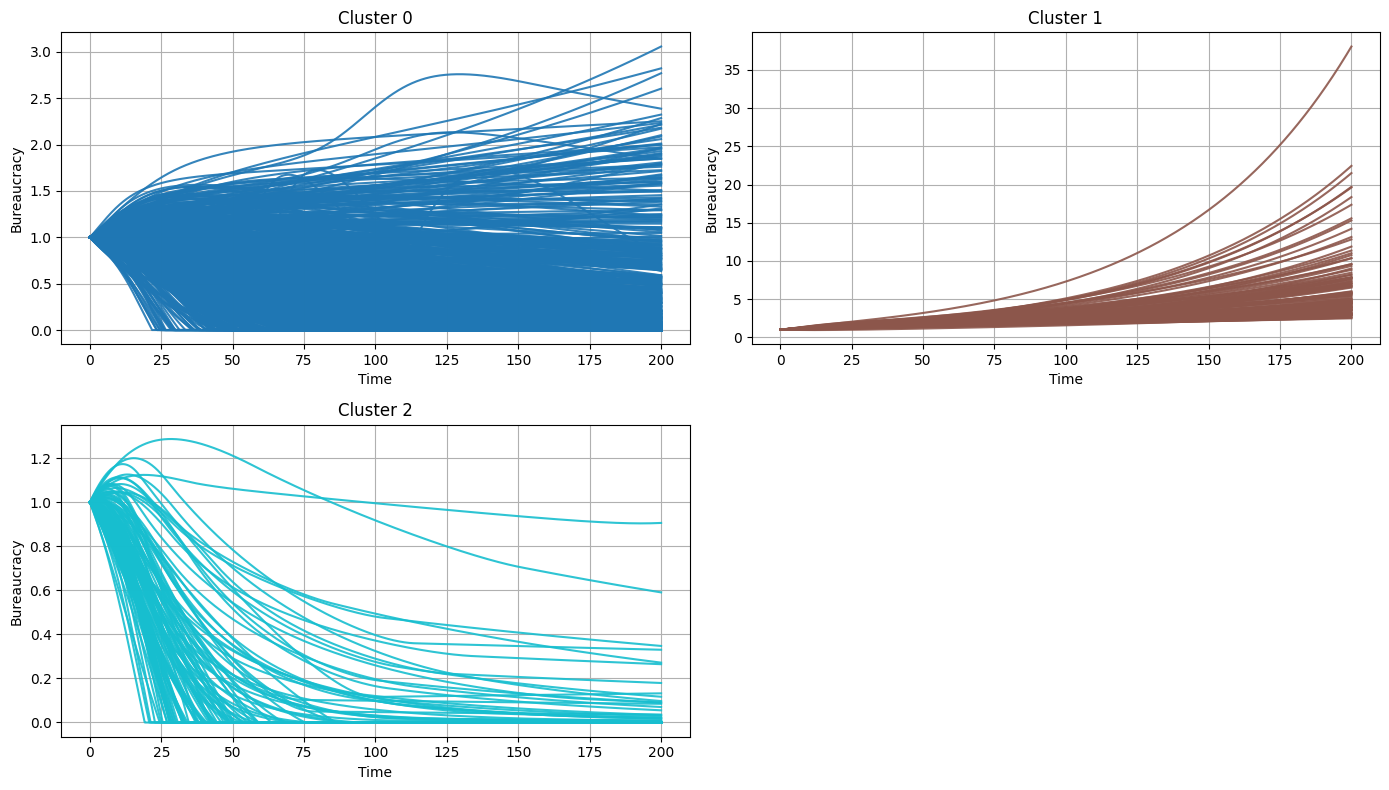

In [50]:
plot_time_series_by_cluster_subplots(labeled_scenarios_df, 'Bureaucracy')